In [25]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [26]:
df = pd.read_excel('measurements2.xlsx')
ad = df[['distance', 'consume']]
td=df[['distance']]
td = td.values
ts = df[['consume']]

In [27]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
5,8.3,6.4,50,21.5,10,NaN,E10,0,0,0,NaN,NaN
6,7.8,4.4,43,21.5,11,NaN,E10,0,0,0,NaN,NaN
7,12.3,5.0,40,21.5,6,NaN,E10,0,0,0,NaN,NaN
8,4.9,6.4,26,21.5,4,NaN,E10,0,0,0,NaN,NaN
9,11.9,5.3,30,21.5,9,NaN,E10,0,0,0,NaN,NaN


In [3]:
train = ad[:300]
test = ad[300:]

In [4]:
import seaborn as sns
sns.pairplot(df[["distance", "consume"]], diag_kind="kde")

In [5]:
train_stats = train.describe()
train_stats.pop("consume")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
distance,300.0,18.378333,18.295321,1.3,11.8,12.85,19.0,162.7


In [6]:
train_labels = train.pop('consume')
test_labels = test.pop('consume')

In [7]:
y = train.mean()
y

distance    18.378333
dtype: float64

In [8]:
def norm(x):
  return (x - train.mean()) / train.std()
normed_train_data = norm(train)
normed_test_data = norm(test)

In [9]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [11]:
model = build_model()

W1023 19:21:34.670594  4176 deprecation.py:506] From c:\users\musth\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [13]:
example_batch = normed_train_data[:10]
example_batch = example_batch.values
example_result = model.predict(example_batch)
example_result

array([[-4.9138553e-03],
       [ 1.7066708e-02],
       [ 1.9207289e-02],
       [ 1.4658544e-02],
       [-6.2136089e-05],
       [ 2.6966911e-02],
       [ 2.8304785e-02],
       [ 1.6263990e-02],
       [ 3.6064390e-02],
       [ 1.7334279e-02]], dtype=float32)

In [14]:
print (train_labels)

0      5.0
1      4.2
2      5.5
3      3.9
4      4.5
      ... 
295    4.5
296    4.1
297    4.1
298    4.5
299    4.2
Name: consume, Length: 300, dtype: float64


In [15]:
train

,distance
0,28.0
1,12.0
2,11.2
3,12.9
4,18.5
5,8.3
6,7.8
7,12.3
8,4.9
9,11.9


In [18]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 10000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [19]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
9995,0.426105,0.430039,0.426105,0.790649,0.673122,0.790649,9995
9996,0.416327,0.431565,0.416327,0.836618,0.718595,0.836618,9996
9997,0.371360,0.417966,0.371360,0.862444,0.716663,0.862444,9997
9998,0.437532,0.447841,0.437532,0.905649,0.739360,0.905649,9998
9999,0.422849,0.442100,0.422849,0.791543,0.664838,0.791543,9999


KeyError: 'mae'

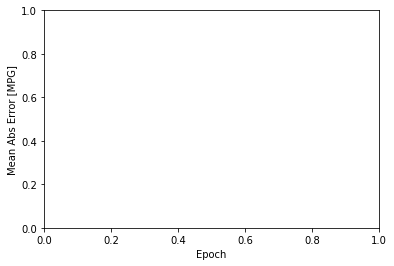

In [20]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)


.........................................

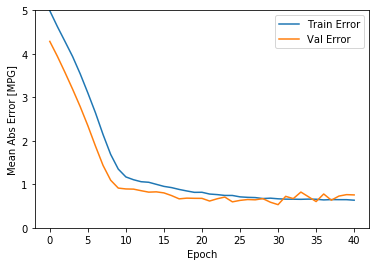

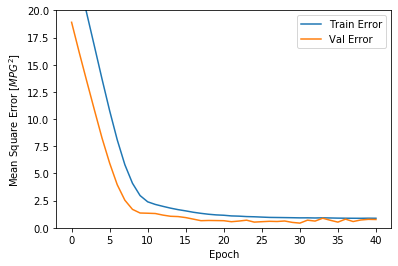

In [56]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [21]:
normed_test_data = normed_test_data.values

In [22]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

88/88 - 0s - loss: 0.7413 - mean_absolute_error: 0.7147 - mean_squared_error: 0.7413
Testing set Mean Abs Error:  0.71 MPG


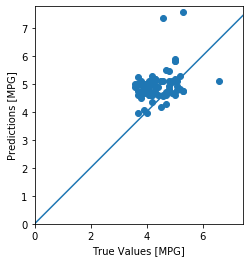

In [23]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


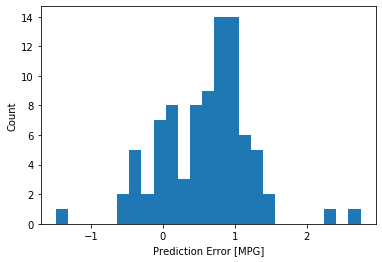

In [24]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [104]:
test_predictions = model.predict([4.5]).flatten()
test_predictions

array([4.370896], dtype=float32)

In [76]:
ad[:300]

,distance,consume
0,28.0,5.0
1,12.0,4.2
2,11.2,5.5
3,12.9,3.9
4,18.5,4.5
5,8.3,6.4
6,7.8,4.4
7,12.3,5.0
8,4.9,6.4
9,11.9,5.3


In [86]:
def modelnew():
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=[len(train.keys())]),
        layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid'),
    ])
    model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])
    
    return model
    

In [87]:
model2 = modelnew()

In [88]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               256       
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 65        
Total params: 41,601
Trainable params: 41,601
Non-trainable params: 0
_________________________________________________________________


In [97]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
model2 = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=[len(train.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(4, activation='relu'),
        layers.Dense(2, activation='relu'),
        layers.Dense(1, activation='relu')])
model2.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])
EPOCHS = 10000

history = model2.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

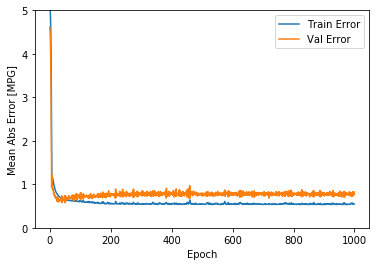

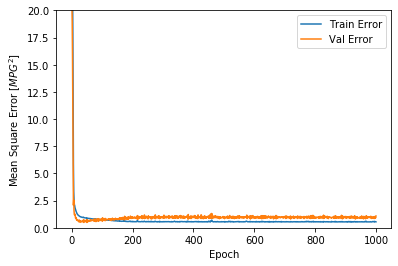

In [96]:
plot_history(history)

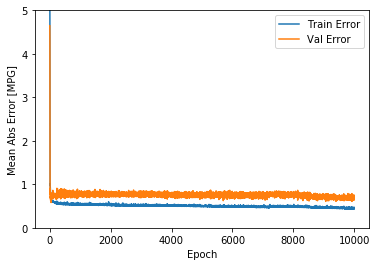

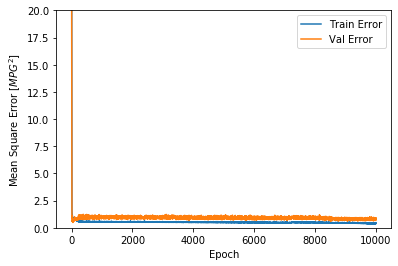

In [99]:
plot_history(history)

In [110]:
test_predictions2 = model2.predict([12])
test_predictions2

array([[7.9632535]], dtype=float32)

In [111]:
tr = ad[['distance']]
tr = tr.values
t = []
for x in tr:
    y = model2.predict([x]).flatten()
    t.append(y)

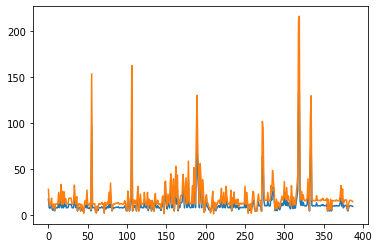

In [115]:
plt.plot(t)
plt.plot(tr)

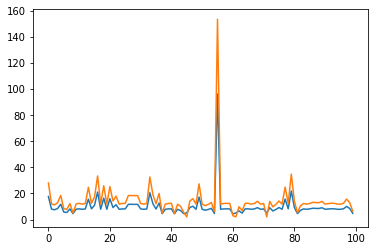

In [116]:
tr = ad[['distance']]
tr = tr[:100]
tr = tr.values
t = []
for x in tr:
    y = model2.predict([x]).flatten()
    t.append(y)
plt.plot(t)
plt.plot(tr)

In [117]:
loss, mae, mse = model2.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} consume".format(mae))

88/1 - 0s - loss: 0.8210 - mae: 0.7846 - mse: 0.8154
Testing set Mean Abs Error:  0.78 consume


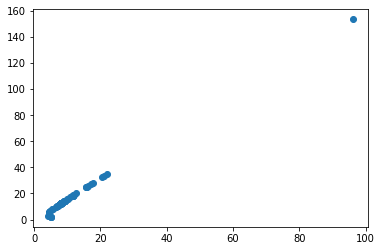

In [118]:
plt.scatter(t, tr)

In [120]:
from keras.models import load_model

model2.save('consumtionmodel.h5')  # creates a HDF5 file 'my_model.h5'

In [124]:
converter = tf.lite.TFLiteConverter.from_keras_model_file('consumtionmodel.h5')
tflite_model = converter.convert()
open("cumsumetionmodel.tflite", "wb").write(tflite_model)

AttributeError: type object 'TFLiteConverterV2' has no attribute 'from_keras_model_file'

NameError: name 'tracking' is not defined